In [ ]:
import pandas as pd
import numpy


In [ ]:
data = pd.read_csv('2019-Oct.csv')

In [ ]:
df = data.sample(10000)

In [ ]:
df.head(5)

In [ ]:
###sort by event time 
### go through each index and see if event type is buy/ view
### then add to total 
###calculate event percentage 
### display popular items over month 

In [ ]:
df['event_time'] = pd.to_datetime(df['event_time'])
 

In [ ]:
df.sort_values(by='event_time')
df.head(5)

In [ ]:
df1= df.sort_values(by='event_time')

In [ ]:
df1.head(30)

In [ ]:
import datetime

In [ ]:
elements=[]
counter=[]
events=[]
index=0
g1=[]
s1=[]
a = pd.date_range(start='10/1/2019', end='10/2/2019')

In [ ]:
df1 = df1.astype({'event_type':'string'})

In [ ]:
enddate = datetime.date(2019,10,2)
startdate= datetime.date(2019,10,1)
delta = datetime.timedelta(days=1)
row=0
errc=0
row_index=0
for index, row in df1.iterrows():
    eventtime= row['event_time']
    eventtype= row['event_type']
    categories = row['category_code']
    if eventtype !='view' and eventtype!="cart":
        if categories not in elements:
            events.append(eventtype)
            elements.append(categories)
            counter.append(1)
        else:
            index= elements.index(categories)
            counter[index]+=1
    else:
        errc+=1
    if(eventtime=='2019-10-08'):
        break
answer = list(zip(elements,counter))
answer

In [ ]:
print(events)

In [ ]:
errc

In [ ]:
res = sorted(answer, key = lambda x: x[1])

In [ ]:
len(res)

In [ ]:
res

In [5]:
import pandas as pd
import datetime

In [9]:
data = pd.read_csv('2019-Oct.csv')

In [14]:
df = data.sample(10000)

In [15]:


df['event_time'] = pd.to_datetime(df['event_time'])

#define a time dimension extractor 
start_date = datetime.date(2019, 10, 1)
end_date = datetime.date(2019, 10, 31)

popularity = {} 
buckets={}

for index, row in df.iterrows():
    event_time = row['event_time']
    event_type = row['event_type']
    product_id = row['product_id']
    brand = row['brand'] 
    if event_type !='view' and event_type!="cart":
        if start_date <= event_time.date() <= end_date:
            popularity[product_id] = popularity.get(product_id, 0) + 1
            bucket_start = (event_time.date() - start_date).days // 7
            buckets.setdefault(bucket_start, dict())
            buckets[bucket_start][product_id] = popularity[product_id]

trending_items = {}  

if len(buckets) >= 2:
    for bucket in range(len(buckets) - 1):
        current_bucket = buckets[bucket]
        next_bucket = buckets[bucket + 1]
        trending_items[bucket] = {
            product: ((next_bucket.get(product, 0) - current_bucket.get(product, 0)) / current_bucket.get(product, 1)) * 100
            for product in set(list(current_bucket.keys()) + list(next_bucket.keys()))
            if current_bucket.get(product, 0) > 0
        }

    last_bucket = buckets[len(buckets) - 1]
    most_popular_items = sorted(last_bucket, key=last_bucket.get, reverse=True)[:10]
    recommended_items = set(trending_items.get(len(buckets) - 2, {})).intersection(most_popular_items)

    product_ids = []
    brands = []
    trending_percentages = []

    for item in recommended_items:
        trending_percentage = trending_items.get(len(buckets) - 2, {}).get(item, 0)
        brand = df[df['product_id'] == item]['brand'].iloc[0]

        if trending_percentage >= 0:
            product_ids.append(item)
            brands.append(brand)
            trending_percentages.append(trending_percentage)


for i in range(len(product_ids)):
    print(f"Product ID: {product_ids[i]}, Brand: {brands[i]}, Trending Percentage: {trending_percentages[i]}")

print("Product IDs:", product_ids)
print("Brands:", brands)
print("Trending Percentages:", trending_percentages)


Product ID: 1004739, Brand: xiaomi, Trending Percentage: 2.4390243902439024
Product ID: 1004870, Brand: samsung, Trending Percentage: 2.941176470588235
Product ID: 1005115, Brand: apple, Trending Percentage: 2.380952380952381
Product ID: 1004767, Brand: samsung, Trending Percentage: 3.6363636363636362
Product IDs: [1004739, 1004870, 1005115, 1004767]
Brands: ['xiaomi', 'samsung', 'apple', 'samsung']
Trending Percentages: [2.4390243902439024, 2.941176470588235, 2.380952380952381, 3.6363636363636362]


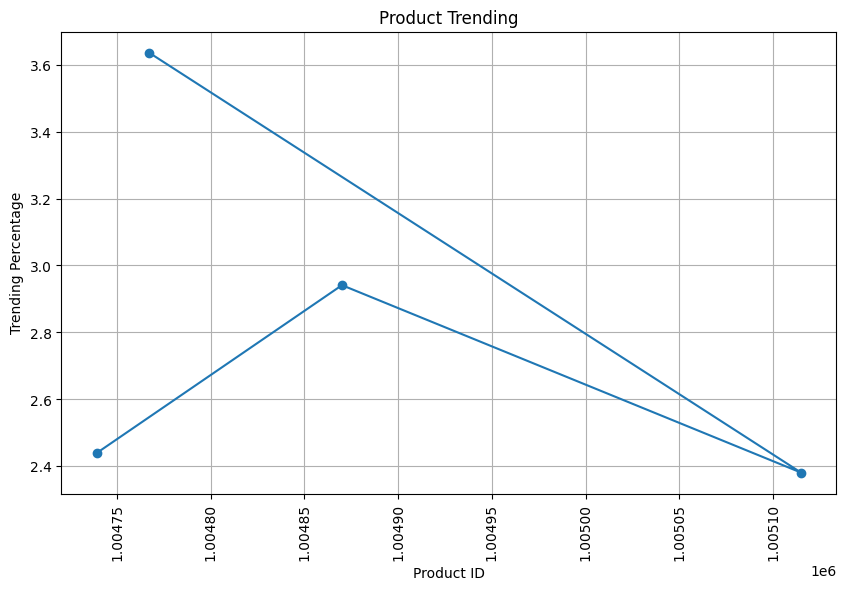

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(product_ids, trending_percentages, marker='o')
plt.xlabel('Product ID')
plt.ylabel('Trending Percentage')
plt.title('Product Trending')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()